# 01 NBS Canonical Correlation Analysis

## Purpose

The purpose of this notebook is to apply the canonical correlation analysis in two datasets. The first dataset consists in three dependent features: _ClientSat_ (satisfaction rate between 1 to 100), _ SuperSat_ (rating of job performance between 1 to 100), and _ProjCompl_ (% of project sucess delivery). The second dataset consist in six independent features: _social skills_ (_PsychTest1_, _PsychTest2_), _intelectual skills_ (_YrsEdu_, _IQ_), and _motivation_ (_HrsTrain_, _HrsWrk_).

## Methodology
To do.

## WIP - improvements

Notable TODOs:
- EDA;
- Using CCA;
- Evaluate the correlation.

## Results
To DO.


# Setup

## Library import
We import all the required Python libraries

In [8]:
import numpy as np
import pandas as pd

from sklearn.cross_decomposition import CCA

import matplotlib.pyplot as plt
%matplotlib inline


# Data import
We retrieve all the required data for the analysis.

In [3]:
df = pd.read_csv('s3://articledatas3/CanonicalCorrelationAnalysisData.csv')
df.head()

,PsychTest1,PsychTest2,YrsEdu,IQ,HrsTrn,HrsWrk,ClientSat,SuperSat,ProjCompl
0,62,78,5,97,6,33,84,59,34
1,46,27,2,93,7,54,55,38,56
2,68,75,2,96,5,47,70,68,38
3,55,56,4,103,7,80,63,81,78
4,51,32,4,98,5,53,55,39,56


# Data processing

## Split the data in to dataset 1 (X) and dataset 2 (Y)

In [4]:
X = df[["PsychTest1", "PsychTest2", "YrsEdu", "IQ", "HrsTrn", "HrsWrk"]]
Y = df[["ClientSat", "SuperSat","ProjCompl"]]

## Istantiate the Canonical Correlation Analysis

In [6]:
cca = CCA(n_components=2)

In [7]:
cca.fit(X, Y)

CCA()

## Obtain the rotation matrices

In [9]:
X_root = cca.x_rotations_
Y_root = cca.y_rotations_

In [12]:
X_root.shape, Y_root.shape

((6, 2), (3, 2))

In [10]:
XY_root = np.vstack((X_root, Y_root))

In [13]:
XY_root.shape

(9, 2)

In [15]:
n_features = XY_root.shape[0]
n_features

9

In [16]:
type(XY_root)

numpy.ndarray

## Plot the correlation

In [19]:
type(df.columns.values)

numpy.ndarray

In [25]:
def plot_correlation(XY_root: np.ndarray, n_features: int, columns: np.ndarray):
    """This function putting the correlation of the Canonical Correlation Analysis

    Args:
        XY_root (np.ndarray): result of the Canonical Correlation Analysis
        n_features (int): number of features include the two datasets.
        columns (np.ndarrya): names of columns to appear in the plot
    """
    plt.figure(figsize=(20, 10), dpi=100)
    
    for feat_id in range(n_features):
        x, y = XY_root[feat_id, 0], XY_root[feat_id, 1]
        plt.arrow(0,0, x,y)
        plt.text(x, y, columns[feat_id], color="purple" if feat_id  >= 6 else "blue")

    plt.show()

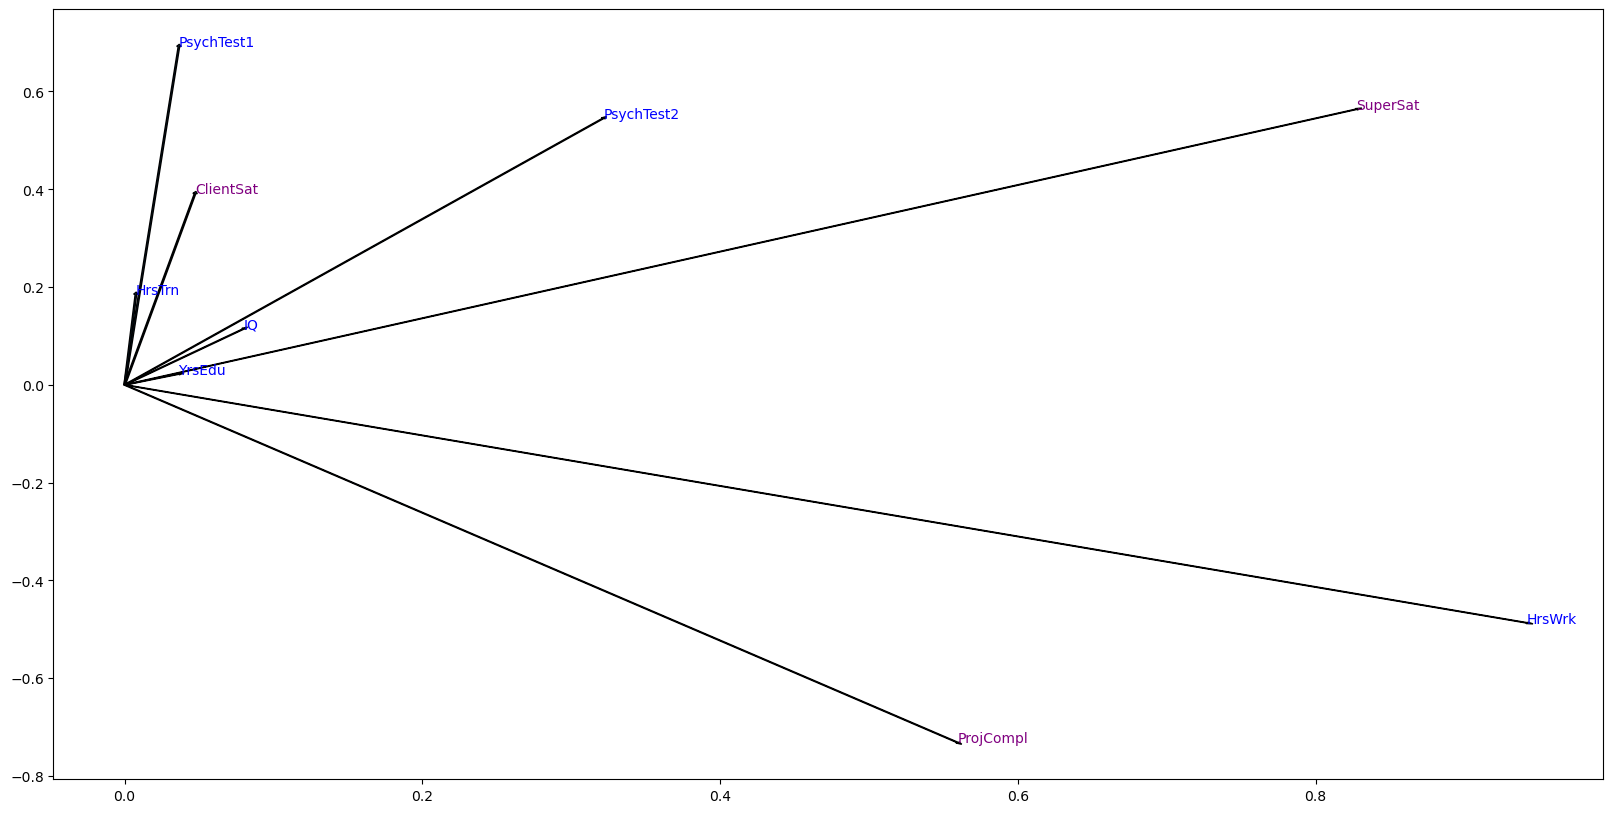

In [26]:
plot_correlation(XY_root, n_features, df.columns.values)

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2